                              #### Final Sprint Project on Netrality Data Sets (Best Model) ####

​ Class Code and Name :- DSC 681-001 - Applied Machine Learning

​ Professor :- Jared Mroz

​ Student Name :- Sai Pranay Tummala and Varun Manjunath.

​ Assignment No./Name :- Grp Project(Final):- Final Sprint Project on Netrality Data Sets

​ Date of Creation :- 05/07/2024

--------------------------------------------------------------------------------------------------------------------------------

##                                                                                Contents:- 

     (I). Importing the Libraries.
     

### 1. Data Preparation of Current Customers and Prospect Customers.
     
   (i) Picking up only the necessary columns.
   
   (ii) Binary column allocation for both the Current and Prospect DataFrames.
   
   (iii) Merging the Current Customers and Prospect Customers.
   
### 2. Clustering with Default Features

   (I) Spectral Clustering and evaluating at the required clusterIDs

   (II) K-Means Clustering and evaluating at the required clusterIDs
   
### 3. Feature Engineering

   (I) Feature Selection
   
### 4. Clustering with Feature Engineering Columns

   (I) Birch Clustering with number of clusters as 5 and evaluating at the required ClusterIDs
   
   (II) Birch Clustering with number of clusters as 7 and evaluating at the required Cluster IDs
   

### 5. Predicting the Potential Customers Company ID's
 
   (I) Concatenating all the required Potential Customer ID's obtained from "Clustering with Default Features" and "Clustering          with Feature Engineering Columns.

--------------------------------------------------------------------------------------------------------------------------------

### --> Importing Libraries

In [380]:
#importing the required the libraries for this Project

import pandas as pd               #giving pandas as pd for calling it easily anywhere in the code
import matplotlib.pyplot as plt   #giving matplotlib.pyplot as plt for calling it easily anywhere in the code
import seaborn as sns             #giving seaborn as sns for calling it easily anywhere in the code
import numpy as np                #giving numpy as np for calling it easily anywhere in the code

from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

# Data Preparation of Current and Prospect Customers

In [381]:
'''Reading and running all the given files into the jupiter and assigning with a desired variable for calling it easily 
within this code '''

cc = pd.read_csv('current_customers.csv')
pc = pd.read_csv('Prospect List Data.csv')

In [382]:
#By calling the cc Data Frame we combined Revenue, Recent Funding Amount, Number of locations and Estimated Budgets of all the Individual Departments which are going to be our features for the further procedures
c1 = cc['Revenue (in 000s USD)'], cc['Est. Marketing Department Budget (in 000s USD)'], cc['Est. Finance Department Budget (in 000s USD)'], cc['Est. IT Department Budget (in 000s USD)'], cc['Est. HR Department Budget (in 000s USD)'], cc['Number of Locations'], cc['Recent Funding Amount (in 000s USD)']
c1 = pd.DataFrame(c1).transpose()    #creating a Data Frame and using "df.transpose()" we are changing the structure of the Data Frame into longitudinal position

#Summing up all the Estimated Budgets of all the departments within the Current Customers csv file
c2 =  cc['Est. Marketing Department Budget (in 000s USD)'] + cc['Est. Finance Department Budget (in 000s USD)'] + cc['Est. IT Department Budget (in 000s USD)'] + cc['Est. HR Department Budget (in 000s USD)']
c2 = pd.DataFrame(c2)   #creating a Data Frame
c2.columns = ['Total Est. Budgets of all the Departments']    #Giving the column name

#By calling the cc Data Frame we have picked up Company IDs.
c3 = cc['Company ID']
c3 = pd.DataFrame(c3)             #creating a Data Frame
c3.columns = ['Company IDs']         #Giving the column name

cC = pd.concat([c3, c1, c2], axis = 1) #here we are concating the created/assigned variables from above
cC['Binary'] = 0                      #assigning a new column which is Binary as assigning '0' for Current Customers
cC.fillna(0, inplace = True)    #ensuring filling up of "Na/Null/NaN" values with "zeros or 0"


#By calling the cc Data Frame we combined Revenue, Recent Funding Amount, Number of locations and Estimated Budgets of all the Individual Departments which are going to be our features for the further procedures
p1 = pc['Revenue (in 000s USD)'], pc['Est. Marketing Department Budget (in 000s USD)'], pc['Est. Finance Department Budget (in 000s USD)'], pc['Est. IT Department Budget (in 000s USD)'], pc['Est. HR Department Budget (in 000s USD)'], pc['Number of Locations'], pc['Recent Funding Amount (in 000s USD)']
p1 = pd.DataFrame(p1).transpose()            #creating a Data Frame and using "df.transpose()" we are changing the structure of the Data Frame into longitudinal position

#Summing up all the Estimated Budgets of all the departments within the Prospect Customers csv file
p2 =  pc['Est. Marketing Department Budget (in 000s USD)'] + pc['Est. Finance Department Budget (in 000s USD)'] + pc['Est. IT Department Budget (in 000s USD)'] + pc['Est. HR Department Budget (in 000s USD)'] 
p2 = pd.DataFrame(p2)                                                #creating a Data Frame
p2.columns = ['Total Est. Budgets of all the Departments']           #Giving the column name

#By calling the cc Data Frame we have picked up Company IDs.
p3 = pc['ZoomInfo Company ID']
p3 = pd.DataFrame(p3)                 #creating a Data Frame
p3.columns = ['Company IDs']         #Giving the column name
              
pC = pd.concat([p3, p1, p2], axis = 1)           #here we are concating the created/assigned variables from above
pC['Binary'] = 1                          #assigning a new column which is Binary as assigning '1' for Prospect Customers
pC.fillna(0, inplace = True)          #ensuring filling up of "Na/Null/NaN" values with "zeros or 0"

In [383]:
"""Here concatenating the created cC and pC DataFrames in such a way like joining them from top & bottom"""

cc_pc = pd.concat([cC, pC])                         #here we are concating the created/assigned variables from above
cc_pc.fillna(0, inplace = True)                      #ensuring filling up of "Na/Null/NaN" values with "zeros or 0"
cc_pc.reset_index(drop = True, inplace = True)       #by resetting the index we are organizing our rows
cc_pc

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Binary
0,1475361,538046000.0,69407934.0,5380460.0,15065288.0,4041427.0,37.0,48000.0,93895109.0,0
1,16400573,256735000.0,33118815.0,2567350.0,7188580.0,228090.0,91.0,1900000.0,43102835.0,0
2,246280,63144419.0,4862120.0,631444.0,2967787.0,1663794.0,49.0,1700000.0,10125145.0,0
3,43076614,364115000.0,18205750.0,3641150.0,10559335.0,139776.0,28.0,0.0,32546011.0,0
4,126828694,136835000.0,11083635.0,2052525.0,5062895.0,253627.0,55.0,0.0,18452682.0,0
...,...,...,...,...,...,...,...,...,...,...
10350,59821843,1329650.0,174184.0,13296.0,45208.0,13685.0,20.0,0.0,246373.0,1
10351,386865700,2287.0,299.0,22.0,77.0,14.0,2.0,87.0,412.0,1
10352,405428692,42133.0,5519.0,421.0,1432.0,790.0,22.0,0.0,8162.0,1
10353,7750504,33428000.0,1671400.0,334280.0,969412.0,2702.0,5.0,0.0,2977794.0,1


C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


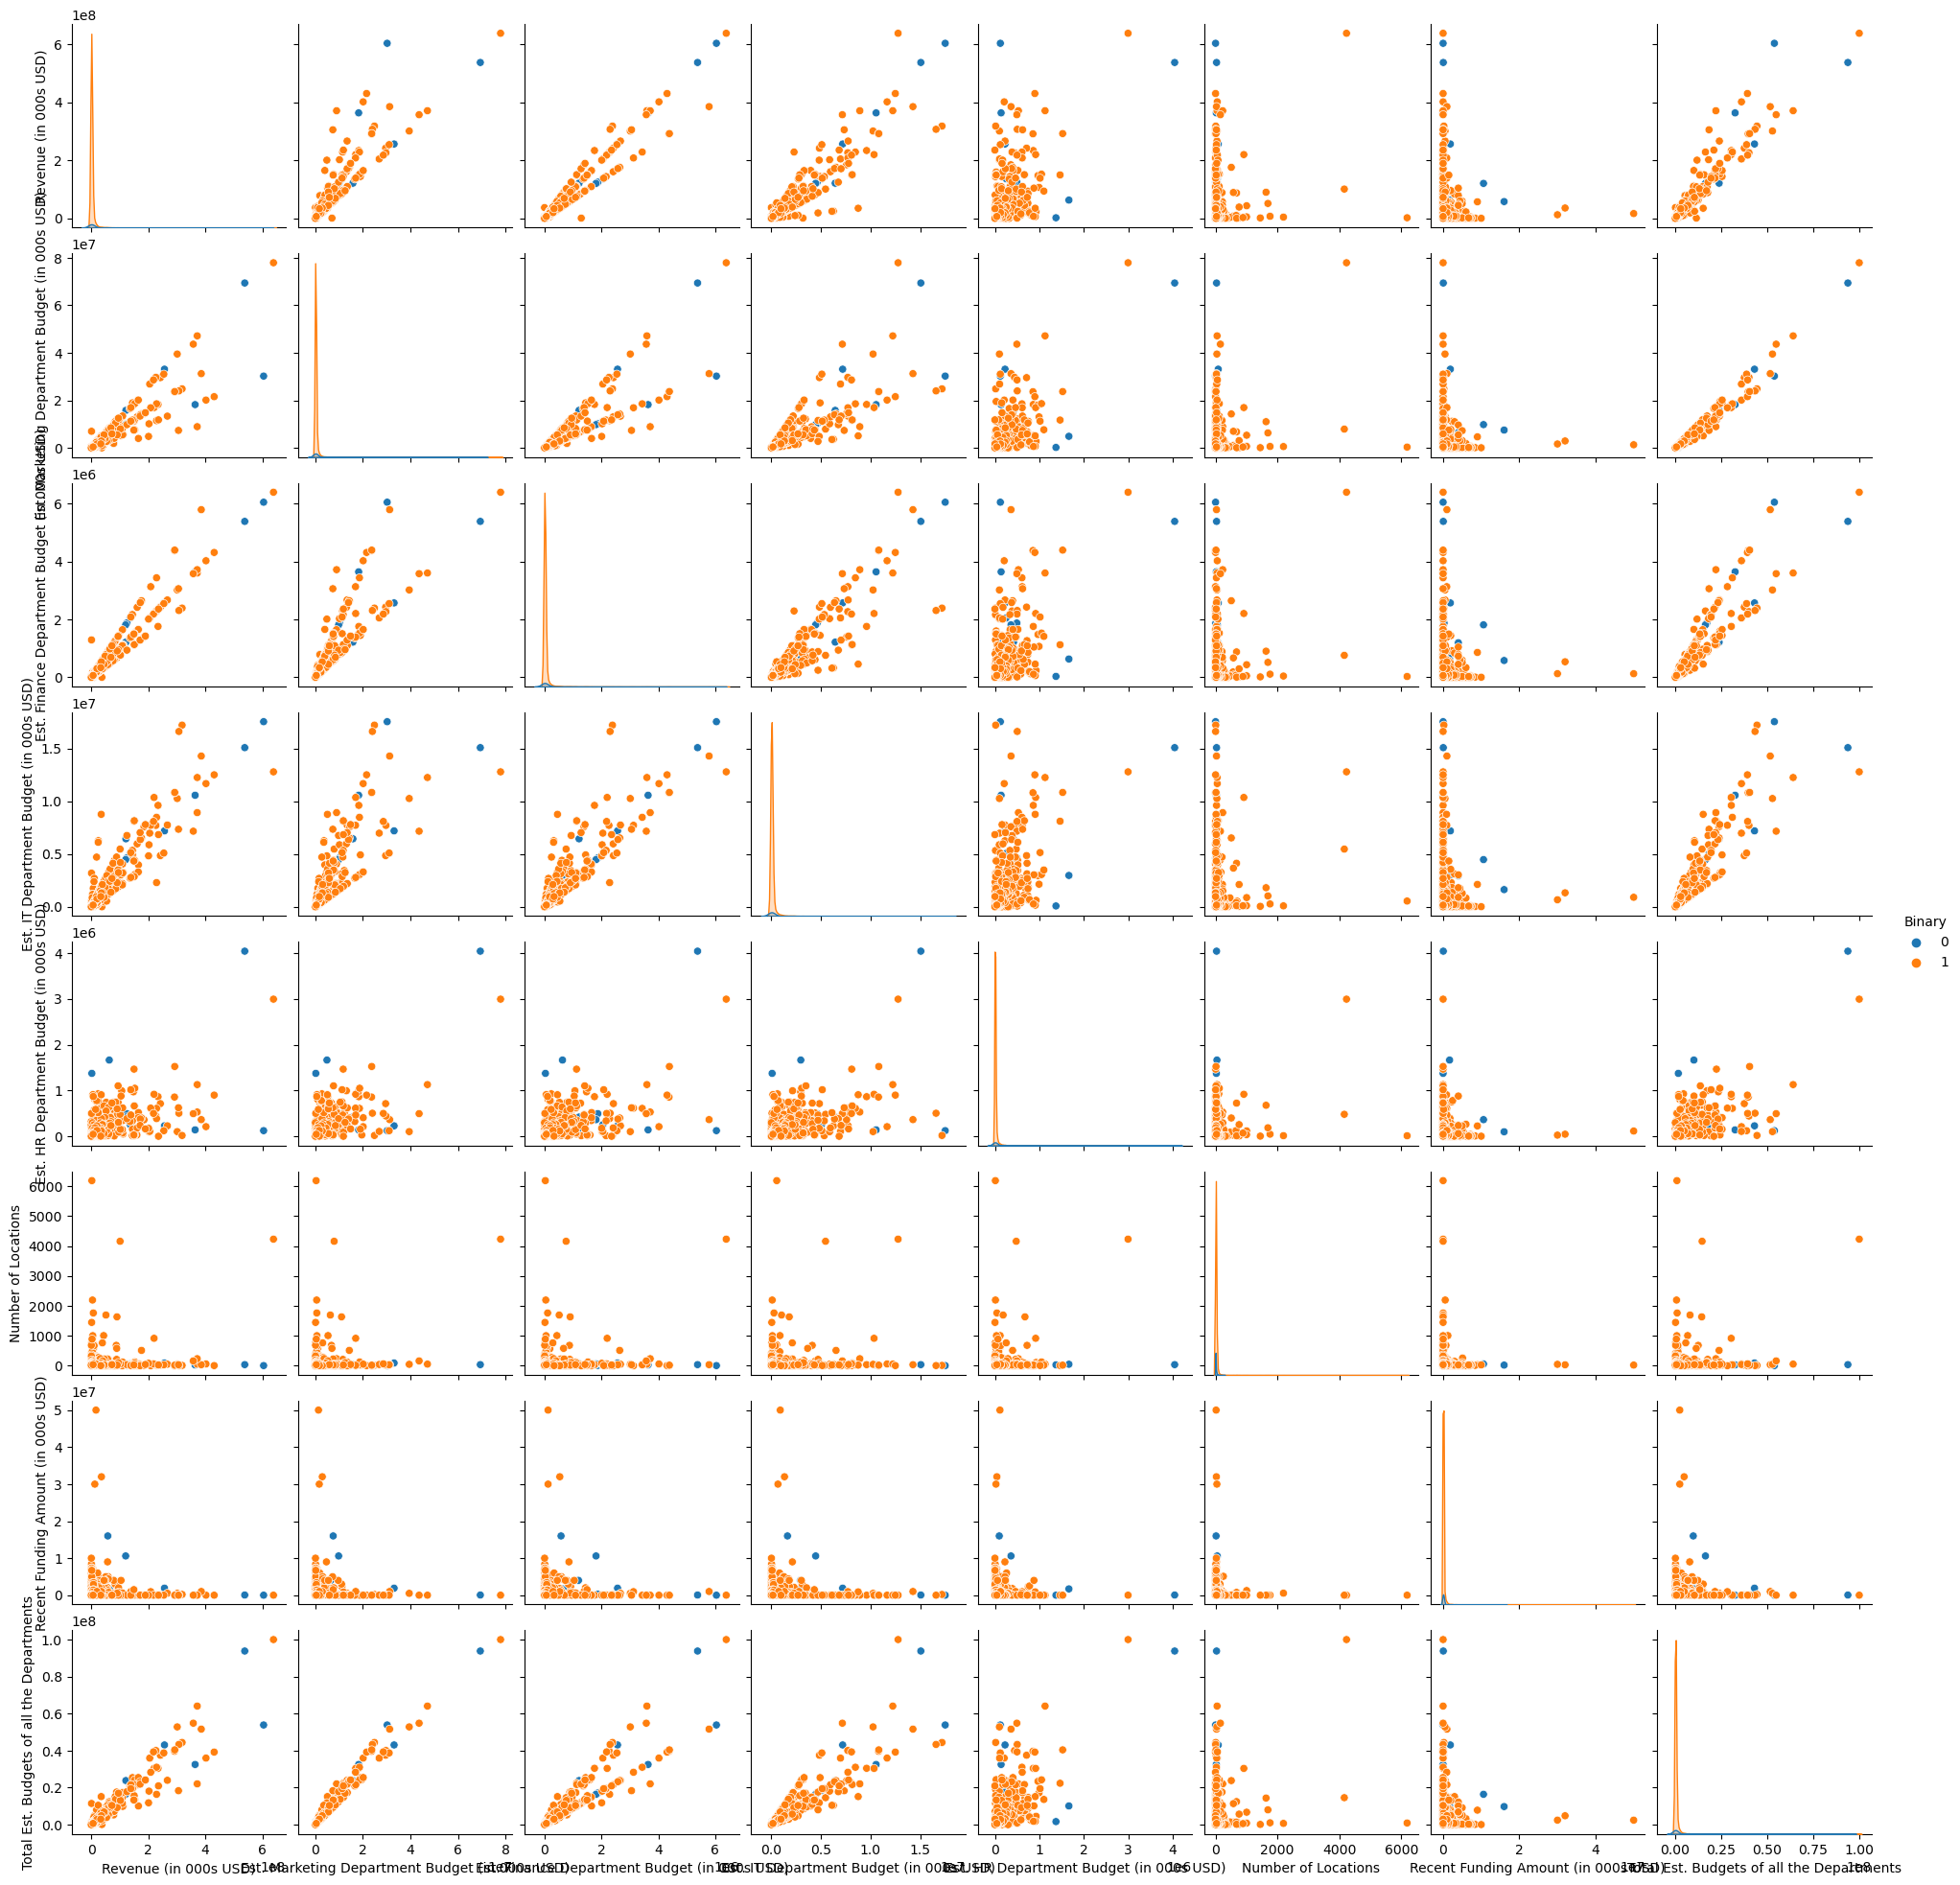

In [384]:
"""Using pairplot we are visualizing different patterns between the columns created"""

sns.pairplot(cc_pc.iloc[:,1:], hue = 'Binary')

In [385]:
"""Selected the Features which can truly and effectively mixz-up with eachother"""

#Assigning the labels to the features variable
features = ['Revenue (in 000s USD)', 'Est. Marketing Department Budget (in 000s USD)', 'Est. Finance Department Budget (in 000s USD)',
           'Est. IT Department Budget (in 000s USD)', 'Est. HR Department Budget (in 000s USD)', 'Number of Locations',
           'Recent Funding Amount (in 000s USD)']    
X = cc_pc[features]                   #Adding the picked up labels to the variable 'X'

# Clustering with Default Features

## Spectral Clustering

### For Number of Clusters = 20 (Spectral Method)

In [386]:
sc = SpectralClustering(n_clusters = 20)
sc.fit(X)
clusterID_S = list(sc.labels_)
cc_pc['Clusters_S'] = clusterID_S
cc_pc

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\prana\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:380: RuntimeWarning: overflow encountered in add
  distances += XX
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:380: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\met

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Binary,Clusters_S
0,1475361,538046000.0,69407934.0,5380460.0,15065288.0,4041427.0,37.0,48000.0,93895109.0,0,0
1,16400573,256735000.0,33118815.0,2567350.0,7188580.0,228090.0,91.0,1900000.0,43102835.0,0,0
2,246280,63144419.0,4862120.0,631444.0,2967787.0,1663794.0,49.0,1700000.0,10125145.0,0,0
3,43076614,364115000.0,18205750.0,3641150.0,10559335.0,139776.0,28.0,0.0,32546011.0,0,0
4,126828694,136835000.0,11083635.0,2052525.0,5062895.0,253627.0,55.0,0.0,18452682.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10350,59821843,1329650.0,174184.0,13296.0,45208.0,13685.0,20.0,0.0,246373.0,1,0
10351,386865700,2287.0,299.0,22.0,77.0,14.0,2.0,87.0,412.0,1,0
10352,405428692,42133.0,5519.0,421.0,1432.0,790.0,22.0,0.0,8162.0,1,0
10353,7750504,33428000.0,1671400.0,334280.0,969412.0,2702.0,5.0,0.0,2977794.0,1,0


###  Evaluation at 11th Cluster for Spectral Clustering

In [414]:
"""Here Evaluating the each cluster of the created number of clusters"""

evaluation_S1 = 11       #checking the 4th cluster over here which is showing close bonds with the current and prospect customers 

dfS = cc_pc[cc_pc['Clusters_S'] == evaluation_S1] #matching the evaluated cluster to the column of clusters of the same evaluation number
predict_prospects_S = dfS[dfS['Binary'] == 1]  # now matching the above syntax line to the binary column where it is '1'(1 = prospect customers) 
#predict_prospects_K_7.reset_index(drop = True, inplace = True) #resetting the index

evaluation_S2 = 11                        #checking the 4th cluster over here which is showing close bonds with the current and prospect customers 
dfS1 = cc_pc[cc_pc['Clusters_S'] == evaluation_S2] #matching the evaluated cluster to the column of clusters of the same evaluation number
current_S = dfS1[dfS1['Binary'] == 0]  #now matching the above syntax line to the binary column where it is '0' (0 = current customers)

In [415]:
predict_prospects_S

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Binary,Clusters_S
3571,7703659,2806.0,218.0,21.0,115.0,27.0,1.0,150.0,381.0,1,11


In [416]:
current_S

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Binary,Clusters_S
241,368816466,2811.0,227.0,42.0,104.0,21.0,2.0,150.0,394.0,0,11


## K - Means Clustering

### For Number of Clusters = 7 (K-Means)

In [420]:
#Creating a K-Means Clustering 

kmeans_7 = KMeans(n_clusters = 7) #giving Number of Clusters in the Hyperparameter
kmeans_7.fit(X)                      #fitting the model
clusterID_K7 = list(kmeans_7.labels_)   #creating a list for the Cluster IDs
cc_pc['Cluster_K7'] = clusterID_K7        #giving a name for the Clustered column
cc_pc

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Binary,Clusters_S,Cluster_K7
0,1475361,538046000.0,69407934.0,5380460.0,15065288.0,4041427.0,37.0,48000.0,93895109.0,0,0,4
1,16400573,256735000.0,33118815.0,2567350.0,7188580.0,228090.0,91.0,1900000.0,43102835.0,0,0,6
2,246280,63144419.0,4862120.0,631444.0,2967787.0,1663794.0,49.0,1700000.0,10125145.0,0,0,3
3,43076614,364115000.0,18205750.0,3641150.0,10559335.0,139776.0,28.0,0.0,32546011.0,0,0,2
4,126828694,136835000.0,11083635.0,2052525.0,5062895.0,253627.0,55.0,0.0,18452682.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10350,59821843,1329650.0,174184.0,13296.0,45208.0,13685.0,20.0,0.0,246373.0,1,0,0
10351,386865700,2287.0,299.0,22.0,77.0,14.0,2.0,87.0,412.0,1,0,0
10352,405428692,42133.0,5519.0,421.0,1432.0,790.0,22.0,0.0,8162.0,1,0,0
10353,7750504,33428000.0,1671400.0,334280.0,969412.0,2702.0,5.0,0.0,2977794.0,1,0,5


### Evaluation at 4th Cluster for K-means

In [421]:
"""Here Evaluating the each cluster of the created number of clusters"""

evaluation_K1 = 4        #checking the 4th cluster over here which is showing close bonds with the current and prospect customers 

dfK = cc_pc[cc_pc['Cluster_K7'] == evaluation_K1] #matching the evaluated cluster to the column of clusters of the same evaluation number
predict_prospects_K_7 = dfK[dfK['Binary'] == 1]  # now matching the above syntax line to the binary column where it is '1'(1 = prospect customers) 
#predict_prospects_K_7.reset_index(drop = True, inplace = True) #resetting the index

evaluation_K2 = 4                        #checking the 4th cluster over here which is showing close bonds with the current and prospect customers 
dfK1 = cc_pc[cc_pc['Cluster_K7'] == evaluation_K2] #matching the evaluated cluster to the column of clusters of the same evaluation number
current_K_7 = dfK1[dfK1['Binary'] == 0]  #now matching the above syntax line to the binary column where it is '0' (0 = current customers)

In [422]:
predict_prospects_K_7 #calling the created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Binary,Clusters_S,Cluster_K7
2624,155353090,638785000.0,77931770.0,6387850.0,12775700.0,2993683.0,4228.0,3000.0,100089003.0,1,0,4


In [423]:
current_K_7  #Calling the Created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Binary,Clusters_S,Cluster_K7
0,1475361,538046000.0,69407934.0,5380460.0,15065288.0,4041427.0,37.0,48000.0,93895109.0,0,0,4
8,2555990,604284257.0,30214212.0,6042842.0,17524243.0,122829.0,5.0,0.0,53904126.0,0,0,4


--------------------------------------------------------------------------------------------------------------------------------

# Clustering with Feature Engineering

In [424]:
                           ####-----Feature Engineering within Prospect Customers-------####

#Creating a new column for Average Revenue at each place by performing mathematical operation with Revenue and Number of Locations
avgRev_perPlace = cc['Revenue (in 000s USD)']/cc['Number of Locations']
avgRev_perPlace = pd.DataFrame(avgRev_perPlace)                 #creating a Data Frame
avgRev_perPlace.columns = ['Average Revenue Per Place']           #Giving the column name

#Creating a new column for Average Employees at each place by performing mathematical operation with Employees and Number of Locations
avgEmp_perPlace = cc['Employees']/cc['Number of Locations']
avgEmp_perPlace = pd.DataFrame(avgEmp_perPlace)                 #creating a Data Frame
avgEmp_perPlace.columns = ['Average Employees Per Place']      #Giving the column name

#Creating a new column for Total Number of Employees across all Locations at each place by performing mathematical operation with Employees and Number of Locations
totalEmp_allLoc = cc['Employees']*cc['Number of Locations']
totalEmp_allLoc = pd.DataFrame(totalEmp_allLoc)                 #creating a Data Frame
totalEmp_allLoc.columns = ['Total Number of Employees across all Locations']

#Creating a new column for Fund Change by performing mathematical operation with Total Funding and Recent Funding
fundChange = (cc['Total Funding Amount (in 000s USD)'] - cc['Recent Funding Amount (in 000s USD)'])/cc['Total Funding Amount (in 000s USD)']
fundChange = pd.DataFrame(fundChange)                            #creating a Data Frame
fundChange.columns = ['Fund Change']                              #Giving the column name

#Creating a new column for Average Salary by performing mathematical operation with Revenue and Employees
avgSal = cc['Revenue (in 000s USD)']/cc['Employees']
avgSal = pd.DataFrame(avgSal)                                      #creating a Data Frame
avgSal.columns = ['Average Salary']                                 #Giving the column name

#Creating a new column for Employees Growth Rate by performing mathematical operation with Past 1 year & Past 2 years Growth rate
emp_growthRate = cc['Past 1 Year Employee Growth Rate']*cc['Past 2 Year Employee Growth Rate']
emp_growthRate = pd.DataFrame(emp_growthRate)                       #creating a Data Frame
emp_growthRate.columns = ['Employees Growth Rate']              #Giving the column name

#Creating a new column for Financial Aspect by performing mathematical operation with Revenue, Employees, Total Funding and Total Estimated Budget
finance1 = cc['Revenue (in 000s USD)']*cc['Employees']*cc['Total Funding Amount (in 000s USD)']*c2['Total Est. Budgets of all the Departments']
finance1 = pd.DataFrame(finance1)                                #creating a Data Frame
finance1.columns = ['Financial Aspect']                      #Giving the column name

#Creating a new column for Total Financial Aspect by performing mathematical operation with Revenue, Employees, Total Funding and Total Estimated Budget
finance2 = cc['Revenue (in 000s USD)']+cc['Employees']+cc['Total Funding Amount (in 000s USD)']+c2['Total Est. Budgets of all the Departments']
finance2 = pd.DataFrame(finance2)                                    #creating a Data Frame
finance2.columns = ['Total Financial Aspect']                              #Giving the column name

#Creating a new column for Total Amount by performing mathematical operation with Total Funding and Total Estimated Budget
finance3 = cc['Total Funding Amount (in 000s USD)'] * c2['Total Est. Budgets of all the Departments']
finance3 = pd.DataFrame(finance3)                               #creating a Data Frame
finance3.columns = ['Total Amount']                      #Giving the column name

#Creating a new column for Profit of Current Customers by performing mathematical operation with Revenue and Total Estimated Budget
profit = cc['Revenue (in 000s USD)'] - c2['Total Est. Budgets of all the Departments']
profit = pd.DataFrame(profit)                             #creating a Data Frame
profit.columns = ['Profit']                 #Giving the column name



cC_feature = pd.concat([c3, c1, c2, profit, finance3, finance2, finance1, emp_growthRate, avgSal, fundChange, totalEmp_allLoc,
               avgEmp_perPlace, avgRev_perPlace], axis = 1)   #here we are concating the created/assigned variables from above
cC_feature['Binary'] = 0                             #assigning a new column which is Binary as assigning '0' for Current Customers
cC_feature.fillna(0, inplace = True)            #ensuring filling up of "Na/Null/NaN" values with "zeros or 0"



                           ####-----Feature Engineering within Prospect Customers-------####



#Creating a new column for Average Revenue at each place by performing mathematical operation with Revenue and Number of Locations
avgRev_perPlace = pc['Revenue (in 000s USD)']/pc['Number of Locations']
avgRev_perPlace = pd.DataFrame(avgRev_perPlace)                                           #creating a Data Frame
avgRev_perPlace.columns = ['Average Revenue Per Place']       #Giving the column name

#Creating a new column for Average Employees at each place by performing mathematical operation with Employees and Number of Locations
avgEmp_perPlace = pc['Employees']/pc['Number of Locations']
avgEmp_perPlace = pd.DataFrame(avgEmp_perPlace)                                                  #creating a Data Frame
avgEmp_perPlace.columns = ['Average Employees Per Place']          #Giving the column name

#Creating a new column for Total Number of Employees across all Locations at each place by performing mathematical operation with Employees and Number of Locations
totalEmp_allLoc = pc['Employees']*pc['Number of Locations']
totalEmp_allLoc = pd.DataFrame(totalEmp_allLoc)                 #creating a Data Frame
totalEmp_allLoc.columns = ['Total Number of Employees across all Locations']

#Creating a new column for Fund Change by performing mathematical operation with Total Funding and Recent Funding
fundChange = (pc['Total Funding Amount (in 000s USD)'] - pc['Recent Funding Amount (in 000s USD)'])/pc['Total Funding Amount (in 000s USD)']
fundChange = pd.DataFrame(fundChange)                       #creating a Data Frame
fundChange.columns = ['Fund Change']             #Giving the column name

#Creating a new column for Average Salary by performing mathematical operation with Revenue and Employees
avgSal = pc['Revenue (in 000s USD)']/pc['Employees']
avgSal = pd.DataFrame(avgSal)                                       #creating a Data Frame
avgSal.columns = ['Average Salary']                #Giving the column name

#Creating a new column for Employees Growth Rate by performing mathematical operation with Past 1 year & Past 2 years Growth rate
emp_growthRate = pc['Past 1 Year Employee Growth Rate']*pc['Past 2 Year Employee Growth Rate']
emp_growthRate = pd.DataFrame(emp_growthRate)                                    #creating a Data Frame
emp_growthRate.columns = ['Employees Growth Rate']        #Giving the column name

#Creating a new column for Financial Aspect by performing mathematical operation with Revenue, Employees, Total Funding and Total Estimated Budget
finance1 = pc['Revenue (in 000s USD)']*pc['Employees']*pc['Total Funding Amount (in 000s USD)']*p2['Total Est. Budgets of all the Departments']
finance1 = pd.DataFrame(finance1)                                               #creating a Data Frame
finance1.columns = ['Financial Aspect']              #Giving the column name

#Creating a new column for Total Financial Aspect by performing mathematical operation with Revenue, Employees, Total Funding and Total Estimated Budget
finance2 = pc['Revenue (in 000s USD)']+pc['Employees']+pc['Total Funding Amount (in 000s USD)']+p2['Total Est. Budgets of all the Departments']
finance2 = pd.DataFrame(finance2)                                    #creating a Data Frame 
finance2.columns = ['Total Financial Aspect']                #Giving the column name

#Creating a new column for Total Amount by performing mathematical operation with Total Funding and Total Estimated Budget
finance3 = pc['Total Funding Amount (in 000s USD)'] * p2['Total Est. Budgets of all the Departments']
finance3 = pd.DataFrame(finance3)                                      #creating a Data Frame
finance3.columns = ['Total Amount']           #Giving the column name

#Creating a new column for Profit of Current Customers by performing mathematical operation with Revenue and Total Estimated Budget
profit = pc['Revenue (in 000s USD)'] - p2['Total Est. Budgets of all the Departments']
profit = pd.DataFrame(profit)                             #creating a Data Frame
profit.columns = ['Profit']              #Giving the column name

              
pC_feature = pd.concat([p3, p1, p2, profit, finance3, finance2, finance1, emp_growthRate, avgSal, fundChange, totalEmp_allLoc,
               avgEmp_perPlace, avgRev_perPlace], axis = 1)    #here we are concating the created/assigned variables from above
pC_feature['Binary'] = 1       #assigning a new column which is Binary as assigning '1' for Prospect Customers
pC_feature.fillna(0, inplace = True) #ensuring filling up of "Na/Null/NaN" values with "zeros or 0"

In [425]:
"""Here concatenating the created cC_feature and pC_feature DataFrames in such a way like joining them from top & bottom"""

f_cc_pc = pd.concat([cC_feature, pC_feature])    #here we are concating the created/assigned variables from above
f_cc_pc.fillna(0, inplace = True) #ensuring filling up of "Na/Null/NaN" values with "zeros or 0"
f_cc_pc.reset_index(drop = True, inplace = True)             #by resetting the index we are organizing our rows
f_cc_pc                                    #Calling the Created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Profit,Total Amount,Total Financial Aspect,Financial Aspect,Employees Growth Rate,Average Salary,Fund Change,Total Number of Employees across all Locations,Average Employees Per Place,Average Revenue Per Place,Binary
0,1475361,538046000.0,69407934.0,5380460.0,15065288.0,4041427.0,37.0,48000.0,93895109.0,444150891.0,4.506965e+12,633530109.0,2.727370e+26,0.00,349.153796,0.000000,57017000.0,41648.648649,1.454178e+07,0
1,16400573,256735000.0,33118815.0,2567350.0,7188580.0,228090.0,91.0,1900000.0,43102835.0,213632165.0,8.297727e+13,301922935.0,2.280791e+26,0.00,1604.593750,0.013038,14560000.0,1758.241758,2.821264e+06,0
2,246280,63144419.0,4862120.0,631444.0,2967787.0,1663794.0,49.0,1700000.0,10125145.0,53019274.0,1.721275e+13,75707564.0,5.502016e+25,0.00,85.561543,0.000000,36162000.0,15061.224490,1.288662e+06,0
3,43076614,364115000.0,18205750.0,3641150.0,10559335.0,139776.0,28.0,0.0,32546011.0,331568989.0,0.000000e+00,396723011.0,0.000000e+00,40.70,5872.822581,0.000000,1736000.0,2214.285714,1.300411e+07,0
4,126828694,136835000.0,11083635.0,2052525.0,5062895.0,253627.0,55.0,0.0,18452682.0,118382318.0,0.000000e+00,155400182.0,0.000000e+00,0.00,1216.311111,0.000000,6187500.0,2045.454545,2.487909e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,59821843,1329650.0,174184.0,13296.0,45208.0,13685.0,20.0,0.0,246373.0,1083277.0,0.000000e+00,1585623.0,0.000000e+00,727.72,138.505208,0.000000,192000.0,480.000000,6.648250e+04,1
10351,386865700,2287.0,299.0,22.0,77.0,14.0,2.0,87.0,412.0,1875.0,3.584400e+04,2792.0,4.918514e+08,0.00,381.166667,0.000000,12.0,3.000000,1.143500e+03,1
10352,405428692,42133.0,5519.0,421.0,1432.0,790.0,22.0,0.0,8162.0,33971.0,4.081000e+07,55695.0,6.877791e+14,-0.00,105.332500,1.000000,8800.0,18.181818,1.915136e+03,1
10353,7750504,33428000.0,1671400.0,334280.0,969412.0,2702.0,5.0,0.0,2977794.0,30450206.0,0.000000e+00,36407345.0,0.000000e+00,0.96,21552.546744,0.000000,7755.0,310.200000,6.685600e+06,1


C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


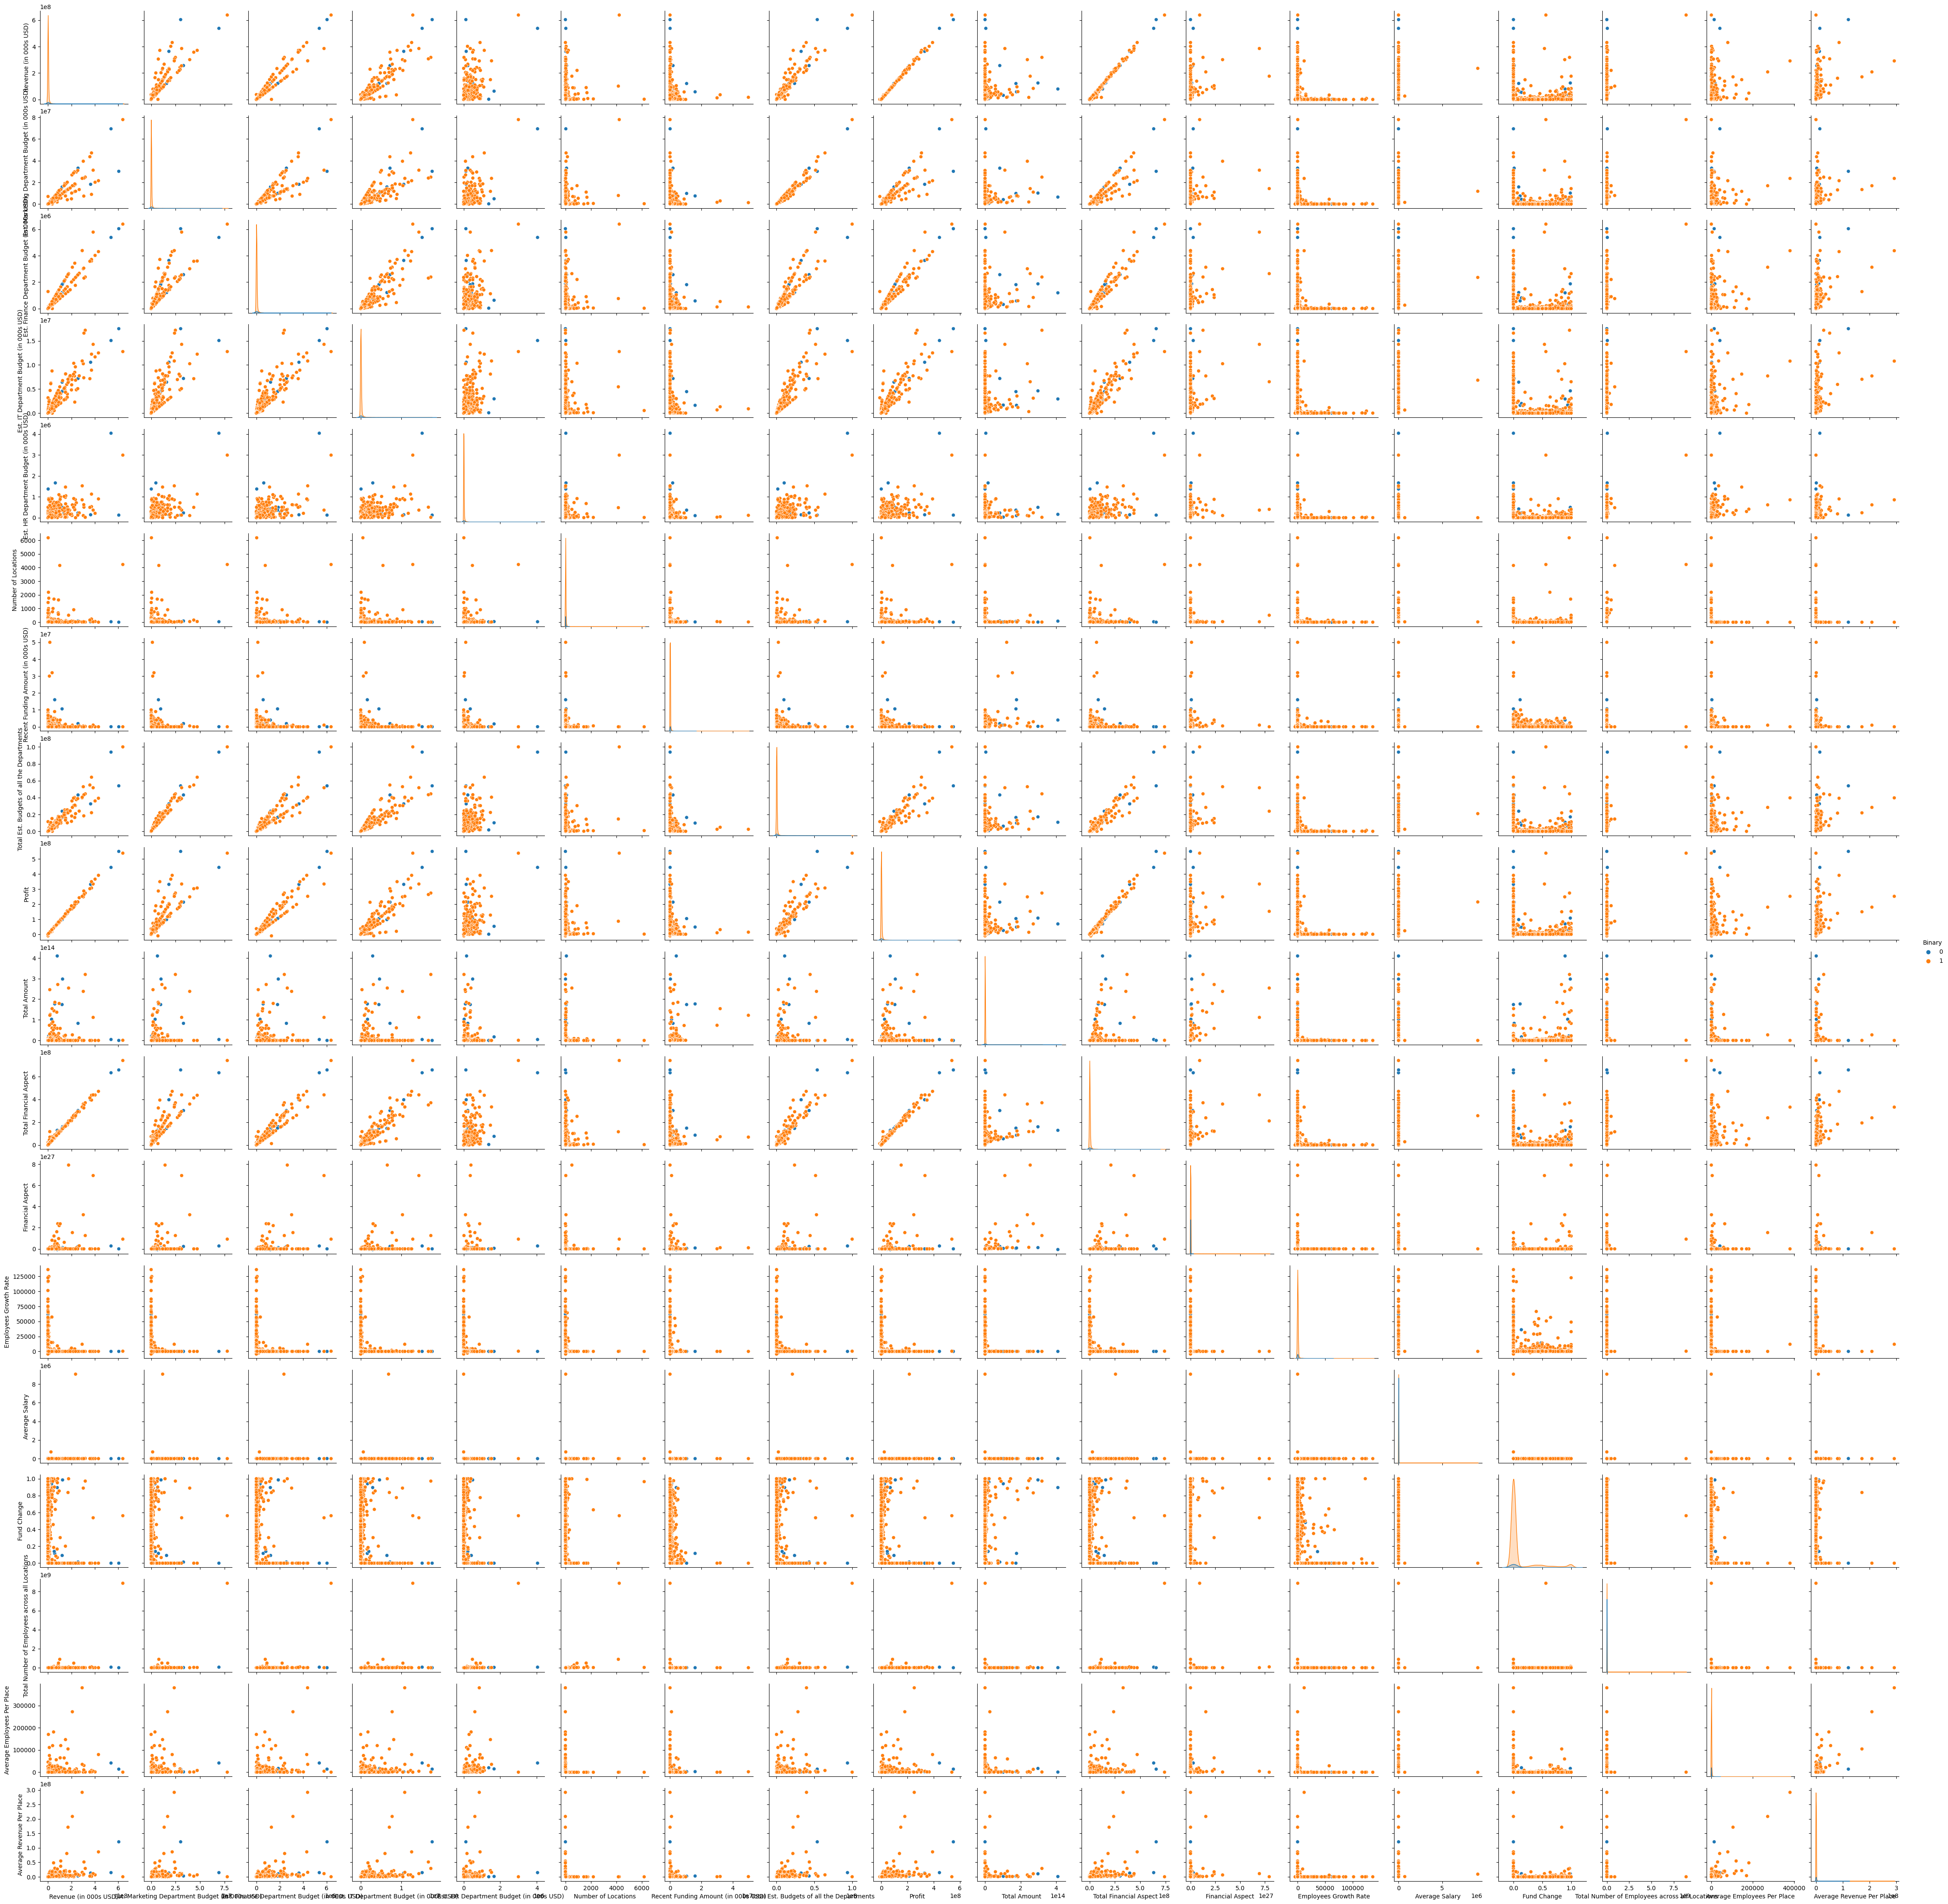

In [426]:
"""Using pairplot we are visualizing different patterns between the columns created"""

sns.pairplot(f_cc_pc.iloc[:,1:], hue = 'Binary')

In [427]:
"""Selected the Features which can truly and effectively mix-up with eachother"""

#Assigning the labels to the features variable
featuresAdv = ['Total Amount', 'Total Financial Aspect', 'Revenue (in 000s USD)', 'Est. Marketing Department Budget (in 000s USD)',
           'Est. IT Department Budget (in 000s USD)', 'Fund Change', 'Average Revenue Per Place']
X_fEng = f_cc_pc[featuresAdv]  #Adding the picked up labels to the variable 'X_fEng'

# Clustering for Feature Engineering

## Birch Clustering (using Feature Engineering Columns)

### For Number of Clusters = 5 (Feature Eng) - Birch

In [428]:
#Creating a Birch Clustering 

bi_5f = Birch(n_clusters = 5)        #giving Number of Clusters in the Hyperparameter
bi_5f.fit(X_fEng)                   #fitting the model
clusterID_5f = list(bi_5f.labels_) #creating a list for the Cluster IDs
f_cc_pc['Cluster_5f_Bi'] = clusterID_5f  #giving a name for the Clustered column

f_cc_pc                                    #calling the created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Profit,...,Total Financial Aspect,Financial Aspect,Employees Growth Rate,Average Salary,Fund Change,Total Number of Employees across all Locations,Average Employees Per Place,Average Revenue Per Place,Binary,Cluster_5f_Bi
0,1475361,538046000.0,69407934.0,5380460.0,15065288.0,4041427.0,37.0,48000.0,93895109.0,444150891.0,...,633530109.0,2.727370e+26,0.00,349.153796,0.000000,57017000.0,41648.648649,1.454178e+07,0,0
1,16400573,256735000.0,33118815.0,2567350.0,7188580.0,228090.0,91.0,1900000.0,43102835.0,213632165.0,...,301922935.0,2.280791e+26,0.00,1604.593750,0.013038,14560000.0,1758.241758,2.821264e+06,0,3
2,246280,63144419.0,4862120.0,631444.0,2967787.0,1663794.0,49.0,1700000.0,10125145.0,53019274.0,...,75707564.0,5.502016e+25,0.00,85.561543,0.000000,36162000.0,15061.224490,1.288662e+06,0,0
3,43076614,364115000.0,18205750.0,3641150.0,10559335.0,139776.0,28.0,0.0,32546011.0,331568989.0,...,396723011.0,0.000000e+00,40.70,5872.822581,0.000000,1736000.0,2214.285714,1.300411e+07,0,0
4,126828694,136835000.0,11083635.0,2052525.0,5062895.0,253627.0,55.0,0.0,18452682.0,118382318.0,...,155400182.0,0.000000e+00,0.00,1216.311111,0.000000,6187500.0,2045.454545,2.487909e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,59821843,1329650.0,174184.0,13296.0,45208.0,13685.0,20.0,0.0,246373.0,1083277.0,...,1585623.0,0.000000e+00,727.72,138.505208,0.000000,192000.0,480.000000,6.648250e+04,1,0
10351,386865700,2287.0,299.0,22.0,77.0,14.0,2.0,87.0,412.0,1875.0,...,2792.0,4.918514e+08,0.00,381.166667,0.000000,12.0,3.000000,1.143500e+03,1,0
10352,405428692,42133.0,5519.0,421.0,1432.0,790.0,22.0,0.0,8162.0,33971.0,...,55695.0,6.877791e+14,-0.00,105.332500,1.000000,8800.0,18.181818,1.915136e+03,1,0
10353,7750504,33428000.0,1671400.0,334280.0,969412.0,2702.0,5.0,0.0,2977794.0,30450206.0,...,36407345.0,0.000000e+00,0.96,21552.546744,0.000000,7755.0,310.200000,6.685600e+06,1,0


### Evaluation at 2nd Cluster for Birch (Feature Eng)

In [429]:
"""Here Evaluating the each cluster of the created number of clusters"""

evaluation_7f_3 = 2     #checking the 2nd cluster over here which is showing close bonds with the current and prospect customers
df_Fe_2 = f_cc_pc[f_cc_pc['Cluster_5f_Bi'] == evaluation_7f_3] #matching the evaluated cluster to the column of clusters of the same evaluation number
predict_prospects_f_5 = df_Fe_2[df_Fe_2['Binary'] == 1] # now matching the above syntax line to the binary column where it is '1'(1 = prospect customers)
#predict_prospects_f_5.reset_index(drop = True, inplace = True) #resetting the index 

evaluation_7f_4 = 2    #checking the 2nd cluster over here which is showing close bonds with the current and prospect customers
df_Fe_3 = f_cc_pc[f_cc_pc['Cluster_5f_Bi'] == evaluation_7f_4]  #matching the evaluated cluster to the column of clusters of the same evaluation number
current_f_5 = df_Fe_3[df_Fe_3['Binary'] == 0] #now matching the above syntax line to the binary column where it is '0' (0 = current customers)

In [430]:
predict_prospects_f_5   #calling the created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Profit,...,Total Financial Aspect,Financial Aspect,Employees Growth Rate,Average Salary,Fund Change,Total Number of Employees across all Locations,Average Employees Per Place,Average Revenue Per Place,Binary,Cluster_5f_Bi
990,67421650,51628000.0,6763268.0,516280.0,1910236.0,369732.0,59.0,4400.0,9559516.0,42068484.0,...,76387416.0,1.217011e+27,0.00,314.804878,0.999707,9676000.0,2779.661017,8.750508e+05,1,2
1241,2441797,385706000.0,31242186.0,5785590.0,14271122.0,362968.0,35.0,1000000.0,51661866.0,334044134.0,...,439691116.0,6.936785e+27,0.00,2395.689441,0.537519,5635000.0,4600.000000,1.102017e+07,1,2
3330,253034667,19363800.0,1510376.0,145228.0,1045645.0,134638.0,1.0,5100000.0,2835887.0,16527913.0,...,66725208.0,1.458252e+26,-85.40,324.237705,0.885305,59721.0,59721.000000,1.936380e+07,1,2
4608,24576142,59315000.0,7236430.0,593150.0,1186300.0,151049.0,105.0,5000000.0,9166929.0,50148071.0,...,88735929.0,7.354192e+26,0.00,885.298507,0.752316,7035000.0,638.095238,5.649048e+05,1,2
5225,5128546,75756000.0,6136236.0,1136340.0,2802972.0,351696.0,50.0,425000.0,10427244.0,65328756.0,...,99478244.0,1.619099e+27,0.03,485.615385,0.967654,7800000.0,3120.000000,1.515120e+06,1,2
6149,104333869,95924000.0,7769844.0,1438860.0,3549188.0,288244.0,23.0,2000000.0,13046136.0,82877864.0,...,122861781.0,2.202241e+27,0.00,750.256150,0.854691,2940665.0,5558.913043,4.170609e+06,1,2
6470,5619763,35819000.0,2901339.0,537285.0,1325303.0,45089.0,31.0,32000000.0,4809016.0,31009984.0,...,72726116.0,1.105117e+26,0.00,1790.950000,0.002435,620000.0,645.161290,1.155452e+06,1,2
7514,25185178,16657470.0,1299282.0,124931.0,899503.0,113805.0,22.0,50000000.0,2437521.0,14219949.0,...,69145471.0,1.024818e+26,-7.38,329.981577,0.000000,1110560.0,2294.545455,7.571577e+05,1,2


In [431]:
current_f_5       #calling the created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Profit,...,Total Financial Aspect,Financial Aspect,Employees Growth Rate,Average Salary,Fund Change,Total Number of Employees across all Locations,Average Employees Per Place,Average Revenue Per Place,Binary,Cluster_5f_Bi
7,3194954,120741000.0,9780021.0,1811115.0,4467417.0,362292.0,59.0,10600000.0,16420845.0,104320155.0,...,147922545.0,4.529607e+25,0.0,751.344119,0.000000,9481300.0,2723.728814,2.046458e+06,0,2
12,32394811,58038010.0,7486903.0,580380.0,1625064.0,98182.0,21.0,16007000.0,9790529.0,48247481.0,...,85989662.0,8.477966e+25,0.0,952.645306,0.115645,1279383.0,2901.095238,2.763715e+06,0,2
13,27181208,31615550.0,4110021.0,316155.0,1675624.0,29427.0,20.0,1000000.0,6131227.0,25484323.0,...,54504682.0,4.154760e+25,0.1,2469.964844,0.940281,256000.0,640.000000,1.580778e+06,0,2


### For Number of Clusters = 7 (Feature Eng) - Birch

In [432]:
#Creating a Birch Clustering
bi_7f = Birch(n_clusters = 7)       #giving Number of Clusters in the Hyperparameter
bi_7f.fit(X_fEng)                  #fitting the model
clusterID_5f_Bi = list(bi_7f.labels_)        #creating a list for the Cluster IDs
f_cc_pc['Cluster_7f_Bi'] = clusterID_5f_Bi      #giving a name for the Clustered column

f_cc_pc                                    #calling the created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Profit,...,Financial Aspect,Employees Growth Rate,Average Salary,Fund Change,Total Number of Employees across all Locations,Average Employees Per Place,Average Revenue Per Place,Binary,Cluster_5f_Bi,Cluster_7f_Bi
0,1475361,538046000.0,69407934.0,5380460.0,15065288.0,4041427.0,37.0,48000.0,93895109.0,444150891.0,...,2.727370e+26,0.00,349.153796,0.000000,57017000.0,41648.648649,1.454178e+07,0,0,0
1,16400573,256735000.0,33118815.0,2567350.0,7188580.0,228090.0,91.0,1900000.0,43102835.0,213632165.0,...,2.280791e+26,0.00,1604.593750,0.013038,14560000.0,1758.241758,2.821264e+06,0,3,3
2,246280,63144419.0,4862120.0,631444.0,2967787.0,1663794.0,49.0,1700000.0,10125145.0,53019274.0,...,5.502016e+25,0.00,85.561543,0.000000,36162000.0,15061.224490,1.288662e+06,0,0,0
3,43076614,364115000.0,18205750.0,3641150.0,10559335.0,139776.0,28.0,0.0,32546011.0,331568989.0,...,0.000000e+00,40.70,5872.822581,0.000000,1736000.0,2214.285714,1.300411e+07,0,0,5
4,126828694,136835000.0,11083635.0,2052525.0,5062895.0,253627.0,55.0,0.0,18452682.0,118382318.0,...,0.000000e+00,0.00,1216.311111,0.000000,6187500.0,2045.454545,2.487909e+06,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,59821843,1329650.0,174184.0,13296.0,45208.0,13685.0,20.0,0.0,246373.0,1083277.0,...,0.000000e+00,727.72,138.505208,0.000000,192000.0,480.000000,6.648250e+04,1,0,5
10351,386865700,2287.0,299.0,22.0,77.0,14.0,2.0,87.0,412.0,1875.0,...,4.918514e+08,0.00,381.166667,0.000000,12.0,3.000000,1.143500e+03,1,0,5
10352,405428692,42133.0,5519.0,421.0,1432.0,790.0,22.0,0.0,8162.0,33971.0,...,6.877791e+14,-0.00,105.332500,1.000000,8800.0,18.181818,1.915136e+03,1,0,5
10353,7750504,33428000.0,1671400.0,334280.0,969412.0,2702.0,5.0,0.0,2977794.0,30450206.0,...,0.000000e+00,0.96,21552.546744,0.000000,7755.0,310.200000,6.685600e+06,1,0,5


### Evaluation at 1st Cluster for Birch (Feature Eng)

In [433]:
"""Here Evaluating the each cluster of the created number of clusters"""

evaluation_7f_5 = 1   #checking the 1st cluster over here which is showing close bonds with the current and prospect customers
df_Fe_4 = f_cc_pc[f_cc_pc['Cluster_7f_Bi'] == evaluation_7f_5] #matching the evaluated cluster to the column of clusters of the same evaluation number
predict_prospects_f_6 = df_Fe_4[df_Fe_4['Binary'] == 1] # now matching the above syntax line to the binary column where it is '1'(1 = prospect customers)
#predict_prospects_f_6.reset_index(drop = True, inplace = True)    #resetting the index

evaluation_7f_6 = 1     #checking the 1st cluster over here which is showing close bonds with the current and prospect customers
df_Fe_5 = f_cc_pc[f_cc_pc['Cluster_7f_Bi'] == evaluation_7f_6] #matching the evaluated cluster to the column of clusters of the same evaluation number
current_f_6 = df_Fe_5[df_Fe_5['Binary'] == 0]  #now matching the above syntax line to the binary column where it is '0' (0 = current customers)

In [434]:
predict_prospects_f_6               #calling the created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Profit,...,Financial Aspect,Employees Growth Rate,Average Salary,Fund Change,Total Number of Employees across all Locations,Average Employees Per Place,Average Revenue Per Place,Binary,Cluster_5f_Bi,Cluster_7f_Bi
2632,24231957,301506000.0,39497286.0,3015060.0,10251204.0,101450.0,47.0,500000.0,52865000.0,248641000.0,...,3.229679e+27,0.00,6700.133333,0.888958,2115000.0,957.446809,6.415021e+06,1,1,1
3371,38683398,318500000.0,24843000.0,2388750.0,17199000.0,17601.0,11.0,203500.0,44448351.0,274051649.0,...,1.259129e+27,4.00,25795.739856,0.971750,135817.0,1122.454545,2.895455e+07,1,1,1
4122,159662254,83979382.0,11001299.0,839793.0,3107237.0,235598.0,8.0,3000000.0,15183927.0,68795455.0,...,2.382124e+27,0.00,803.607380,0.832181,836024.0,13062.875000,1.049742e+07,1,1,1
6203,43897815,176191000.0,14271471.0,2642865.0,6519067.0,399040.0,512.0,7500.0,23832443.0,152358557.0,...,7.928448e+27,109.44,995.429379,0.999297,90624000.0,345.703125,3.441230e+05,1,1,1
7807,37962377,15845000.0,1933090.0,158450.0,316900.0,83415.0,13.0,2300000.0,2491855.0,13353145.0,...,1.444220e+26,-0.66,428.243243,0.976735,481000.0,2846.153846,1.218846e+06,1,1,1


In [435]:
current_f_6                    #calling the created DataFrame

,Company IDs,Revenue (in 000s USD),Est. Marketing Department Budget (in 000s USD),Est. Finance Department Budget (in 000s USD),Est. IT Department Budget (in 000s USD),Est. HR Department Budget (in 000s USD),Number of Locations,Recent Funding Amount (in 000s USD),Total Est. Budgets of all the Departments,Profit,...,Financial Aspect,Employees Growth Rate,Average Salary,Fund Change,Total Number of Employees across all Locations,Average Employees Per Place,Average Revenue Per Place,Binary,Cluster_5f_Bi,Cluster_7f_Bi
6,28117851,124915076.0,10118121.0,1873726.0,4621857.0,493758.0,12.0,250000.0,17107462.0,107807614.0,...,1.185841e+26,0.0,604.157865,0.98564,2481108.0,17229.916667,1.040959e+07,0,1,1


# Potential Customers from all the Clustering Methods

In [450]:
"""Here going to obtain the List of Predicted Potential Company ID's"""

ppc1 = predict_prospects_S['Company IDs'] #assigning a varaibale by calling the Company ID column from predict_prospects_S Data Frame
ppc2 = predict_prospects_K_7['Company IDs'] #assigning a varaibale by calling the Company ID column from predict_prospects_K_7 Data Frame
ppc3 = predict_prospects_f_5['Company IDs'] #assigning a varaibale by calling the Company ID column from predict_prospects_f_5 Data Frame
ppc4 = predict_prospects_f_6['Company IDs'] #assigning a varaibale by calling the Company ID column from predict_prospects_f_6 Data Frame

ppc5 = predict_prospects_S['Revenue (in 000s USD)'] #assigning a varaibale by calling the Revenue (in 000s USD) column from predict_prospects_S Data Frame
ppc6 = predict_prospects_K_7['Revenue (in 000s USD)'] #assigning a varaibale by calling the Revenue (in 000s USD) column from predict_prospects_K_7 Data Frame
ppc7 = predict_prospects_f_5['Revenue (in 000s USD)'] #assigning a varaibale by calling the Revenue (in 000s USD) column from predict_prospects_f_5 Data Frame
ppc8 = predict_prospects_f_6['Revenue (in 000s USD)'] #assigning a varaibale by calling the Revenue (in 000s USD) column from predict_prospects_f_6 Data Frame



potential_Customers1 = pd.concat([ppc1, ppc2, ppc3, ppc4]) #here we are concating the created/assigned variables from above
#potential_Customers1.columns = ['Predicted Potential Company IDs (Clustering Method)']  #Giving the column name

potential_Customers2 = pd.concat([ppc5, ppc6, ppc7, ppc8])#here we are concating the created/assigned variables from above
#potential_Customers2.columns = ['Revenue']  #Giving the column name

potential_Customers = pd.concat([potential_Customers1, potential_Customers2], axis = 1) #concatenating the DataFrames
potential_Customers.fillna(0, inplace = True)               #ensuring filling up of "Na/Null/NaN" values with "zeros or 0"
potential_Customers.reset_index(drop = True, inplace = True)   #resetting the index 

potential_Customers = pd.DataFrame(potential_Customers)       #creating a Data Frame
#Giving the column name:-
potential_Customers = potential_Customers.rename(columns = {'Company IDs': 'Predicted Potential Company IDs (Clustering Method)', 'Revenue (in 000s USD)': 'Revenue'})


potential_Customers          #Calling the Data Frame created

,Predicted Potential Company IDs (Clustering Method),Revenue
0,7703659,2806.0
1,155353090,638785000.0
2,67421650,51628000.0
3,2441797,385706000.0
4,253034667,19363800.0
5,24576142,59315000.0
6,5128546,75756000.0
7,104333869,95924000.0
8,5619763,35819000.0
9,25185178,16657470.0
